In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('D:/Real_Estate_Business_Project/datasets/gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.72,6660.0,3,2,3,3.0,Under Construction,978.0,0,0,0,0,0,1,0
1,flat,emaar gurgaon greens,sector 102,1.42,8606.0,3,3,3,4.0,Relatively New,1314.0,0,0,0,0,1,1,49
2,flat,dlf regency park,sector 28,2.35,13225.0,3,4,3,8.0,Old Property,1700.0,0,1,0,0,0,0,109
3,flat,tulip violet,sector 69,3.05,9664.0,4,5,3+,14.0,Relatively New,2856.0,0,1,0,0,1,1,49
4,flat,emaar imperial gardens,sector 102,1.98,9900.0,3,3,3+,9.0,Relatively New,2222.0,0,1,0,0,0,0,72


In [6]:
latlong = pd.read_csv('D:/Real_Estate_Business_Project/datasets/latlong.csv')

In [7]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [8]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [9]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [10]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [11]:
new_df = df.merge(latlong, on='sector')

In [12]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [13]:
group_df = new_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [14]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326
sector 95,0.480545,5602.509091,995.981818,28.4172,76.9081


In [15]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [17]:
new_df.to_csv('data_viz1.csv',index=False)

In [19]:
df1 = pd.read_csv('D:/Real_Estate_Business_Project/datasets/gurgaon_properties.csv')

In [20]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 36 Sohna,flat,signature global park 4,0.72,6660.0,1081.0,Super Built up area 1081(100.43 sq.m.),3,2,3,not available,"Sector 36 Sohna, Gurgaon, Haryana",3.0,NaN,Under Construction,NaN,Residential apartment for sell.Located in sect...,[],NaN,NaN
1,3 BHK Flat in Sector 102 Gurgaon,flat,emaar gurgaon greens,1.42,8606.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,others,"Sector 102 Gurgaon, Gurgaon, Haryana",4.0,North,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway'...","Situated in sector 102 gurgaon, emaar gurgaon ...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction4 out of..."
2,3 BHK Flat in DLF Phase 4,flat,dlf regency park,2.35,13224.0,1777.0,Super Built up area 1777(165.09 sq.m.)Built Up...,3,4,3,servant room,"000, DLF Phase 4, Gurgaon, Haryana",8.0,South-East,10+ Year Old,"['Dlf phase 1 metro station', 'Sector 42-43 me...",Check out this 3 bhk apartment for sale in dlf...,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area5 out of 5', 'Construction5 out of..."
3,4 BHK Flat in Sector 69 Gurgaon,flat,tulip violet,3.05,9664.0,3156.0,Super Built up area 3156(293.2 sq.m.),4,5,3+,"servant room,others","Sector 69 Gurgaon, Gurgaon, Haryana",14.0,South-West,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral ...",This lovely 4 bhk apartment/flat in sector 69 ...,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction4 out of..."
4,3 BHK Flat in Sector 102 Gurgaon,flat,emaar imperial gardens,1.98,9900.0,2000.0,Carpet area: 2000 (185.81 sq.m.),3,3,3+,servant room,"Sector 102 Gurgaon, Gurgaon, Haryana",9.0,North,1 to 5 Year Old,"['Satya The Hive Mall', 'Gurugram Road', 'Dwar...","This is on dwarika express highway , the locat...","['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Intercom Fac...","['Connectivity3.5 out of 5', 'Management4.5 ou..."


In [21]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [22]:
wordcloud_df.head()

,features,sector
0,NaN,sector 36
1,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 102
2,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 28
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 69
4,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",sector 102


In [23]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [24]:
main

['Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Piped-gas',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Internet/wi-fi connectivity',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softening plant',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Internet/wi-fi connectivity',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Club hous

In [25]:
from wordcloud import WordCloud

In [26]:
feature_text = ' '.join(main)

In [27]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [28]:
feature_text

'Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Piped-gas Visitor Parking Swimming Pool Park Security Personnel Internet/wi-fi connectivity Shopping Centre Fitness Centre / GYM Rain Water Harvesting Club house / Community Center Water softening plant Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Swimming Pool Park Security Personnel Internet/wi-fi connectivity Shopping Centre Fitness Centre / GYM Club house / Community Center Rain Water Harvesting Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Water Storage Piped-gas Visitor P

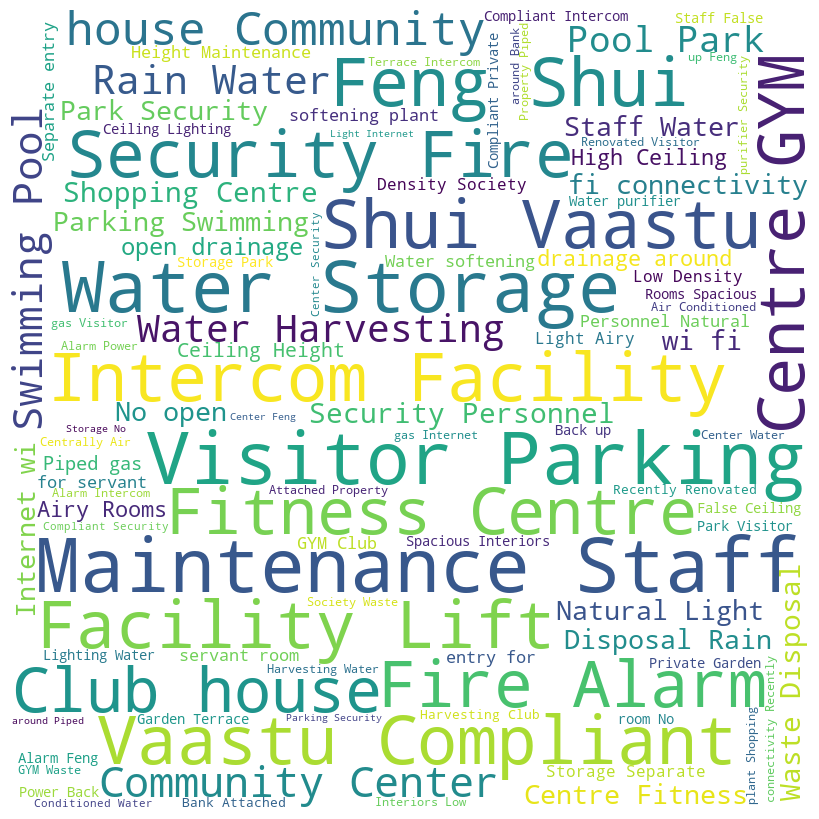

In [29]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [30]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [31]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [32]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [33]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


d:\Real_Estate_Business_Project\realestate\lib\site-packages\ipykernel_launcher.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


d:\Real_Estate_Business_Project\realestate\lib\site-packages\ipykernel_launcher.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='price', ylabel='Density'>

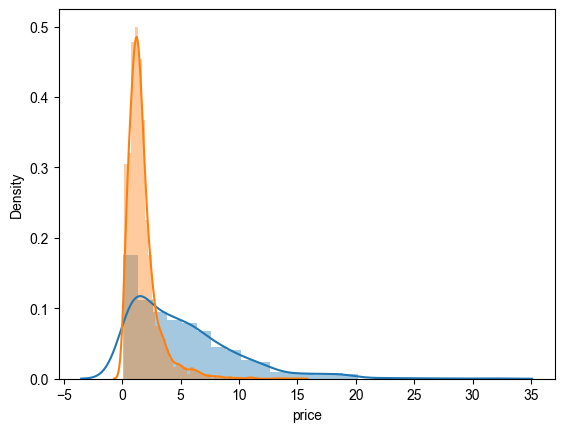

In [34]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [35]:
new_df['sector'].unique().tolist().insert(0,'overall')